# Importing libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline


pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
main=pd.read_csv('listings.csv')
main.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9560\3038471142.py:1: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  main=pd.read_csv('listings.csv')


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220603182654,2022-06-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.31
1,5121,https://www.airbnb.com/rooms/5121,20220603182654,2022-06-04,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220603182654,2022-06-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178,https://www.airbnb.com/rooms/5178,20220603182654,2022-06-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.44,4.87,4.39,NaN,f,1,0,1,0,3.37
4,5203,https://www.airbnb.com/rooms/5203,20220603182654,2022-06-03,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.76


In [3]:
main.shape

(37410, 74)

In [4]:
main.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  int64  
 1   listing_url                                   37410 non-null  object 
 2   scrape_id                                     37410 non-null  int64  
 3   last_scraped                                  37410 non-null  object 
 4   name                                          37396 non-null  object 
 5   description                                   36523 non-null  object 
 6   neighborhood_overview                         22430 non-null  object 
 7   picture_url                                   37410 non-null  object 
 8   host_id                                       37410 non-null  int64  
 9   host_url                                      37410 non-null 

# Removing the Duplicates if any

In [6]:
main.duplicated().sum()
main.drop_duplicates().reset_index(drop=True)
main.shape

(37410, 74)

In [7]:
main.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220603182654,2022-06-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.31
1,5121,https://www.airbnb.com/rooms/5121,20220603182654,2022-06-04,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220603182654,2022-06-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178,https://www.airbnb.com/rooms/5178,20220603182654,2022-06-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.44,4.87,4.39,NaN,f,1,0,1,0,3.37
4,5203,https://www.airbnb.com/rooms/5203,20220603182654,2022-06-03,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.76


# Drop unnecessary columns

In [8]:
airbnb=main.filter(["description","host_is_superhost","host_identity_verified","host_response_time","host_response_rate","price","property_type"],axis=1).copy().reset_index(drop=True)

In [9]:
airbnb.head()

,description,host_is_superhost,host_identity_verified,host_response_time,host_response_rate,price,property_type
0,"Beautiful, spacious skylit studio in the heart...",f,t,a few days or more,39%,$225.00,Entire rental unit
1,One room available for rent in a 2 bedroom apt...,f,t,within an hour,100%,$60.00,Private room in rental unit
2,We welcome you to stay in our lovely 2 br dupl...,f,t,within an hour,100%,$275.00,Entire rental unit
3,Please don’t expect the luxury here just a bas...,f,f,within a day,100%,$68.00,Private room in rental unit
4,"Our best guests are seeking a safe, clean, spa...",f,t,NaN,NaN,$75.00,Private room in rental unit


# Check for the null values in each column

In [10]:
airbnb.shape

(37410, 7)

In [11]:
airbnb.isnull().sum()

description                 887
host_is_superhost            66
host_identity_verified       66
host_response_time        13210
host_response_rate        13210
price                         0
property_type                 0
dtype: int64

In [12]:
airbnb=airbnb.dropna().reset_index(drop=True)
print(airbnb.shape)
airbnb.isnull().sum()

(23777, 7)


description               0
host_is_superhost         0
host_identity_verified    0
host_response_time        0
host_response_rate        0
price                     0
property_type             0
dtype: int64

In [13]:
airbnb.head()

,description,host_is_superhost,host_identity_verified,host_response_time,host_response_rate,price,property_type
0,"Beautiful, spacious skylit studio in the heart...",f,t,a few days or more,39%,$225.00,Entire rental unit
1,One room available for rent in a 2 bedroom apt...,f,t,within an hour,100%,$60.00,Private room in rental unit
2,We welcome you to stay in our lovely 2 br dupl...,f,t,within an hour,100%,$275.00,Entire rental unit
3,Please don’t expect the luxury here just a bas...,f,f,within a day,100%,$68.00,Private room in rental unit
4,<b>The space</b><br />Beautiful 1br on the Upp...,t,t,within a few hours,100%,$135.00,Entire rental unit


In [14]:
airbnb=pd.DataFrame(airbnb)

In [15]:
airbnb.head()

,description,host_is_superhost,host_identity_verified,host_response_time,host_response_rate,price,property_type
0,"Beautiful, spacious skylit studio in the heart...",f,t,a few days or more,39%,$225.00,Entire rental unit
1,One room available for rent in a 2 bedroom apt...,f,t,within an hour,100%,$60.00,Private room in rental unit
2,We welcome you to stay in our lovely 2 br dupl...,f,t,within an hour,100%,$275.00,Entire rental unit
3,Please don’t expect the luxury here just a bas...,f,f,within a day,100%,$68.00,Private room in rental unit
4,<b>The space</b><br />Beautiful 1br on the Upp...,t,t,within a few hours,100%,$135.00,Entire rental unit


# Remove HTML TAG 

In [16]:
def remove_tag(lines):
    CLEANR = re.compile('<.*?>') 
    cleantext = re.sub(CLEANR, '', lines)
    return cleantext
size=airbnb.shape
print(size[0])
for i in range(0,size[0]):
    #print(i)
    try:
        line=airbnb['description'][i]
        line=remove_tag(line)
        airbnb['description'][i]=line
        line=airbnb['host_response_time'][i]
        line=remove_tag(line)
        airbnb['host_response_time'][i]=line
        line=airbnb['property_type'][i]
        line=remove_tag(line)
        airbnb['property_type'][i]=line
    except:
        pass
airbnb.head()

23777


,description,host_is_superhost,host_identity_verified,host_response_time,host_response_rate,price,property_type
0,"Beautiful, spacious skylit studio in the heart...",f,t,a few days or more,39%,$225.00,Entire rental unit
1,One room available for rent in a 2 bedroom apt...,f,t,within an hour,100%,$60.00,Private room in rental unit
2,We welcome you to stay in our lovely 2 br dupl...,f,t,within an hour,100%,$275.00,Entire rental unit
3,Please don’t expect the luxury here just a bas...,f,f,within a day,100%,$68.00,Private room in rental unit
4,The spaceBeautiful 1br on the Upper West Side....,t,t,within a few hours,100%,$135.00,Entire rental unit


In [17]:
# NORMALIZATION
airbnb['description'] = airbnb['description'].str.lower()
airbnb['description'].head(3)

0    beautiful, spacious skylit studio in the heart...
1    one room available for rent in a 2 bedroom apt...
2    we welcome you to stay in our lovely 2 br dupl...
Name: description, dtype: object

In [18]:
# REMOVE LINKS
def remove_links(desc):
    desc_no_link = re.sub(r"http\S+", "", desc)
    return desc_no_link
airbnb['description'] = np.vectorize(remove_links)(airbnb['description'])

In [19]:
# REMOVE Punctuations, Numbers, and Special Characters
airbnb['description'] = airbnb['description'].str.replace("[^a-zA-Z#]", " ")

C:\Users\Dell\AppData\Local\Temp\ipykernel_9560\2502770076.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  airbnb['description'] = airbnb['description'].str.replace("[^a-zA-Z#]", " ")


In [20]:
# REMOVE SHORT WORDS
airbnb['description'] = airbnb['description'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [21]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_words = 500
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

X, tokenizer = tokenize_pad_sequences(airbnb['description'])

D:\ANACODA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants delivering online or Not')

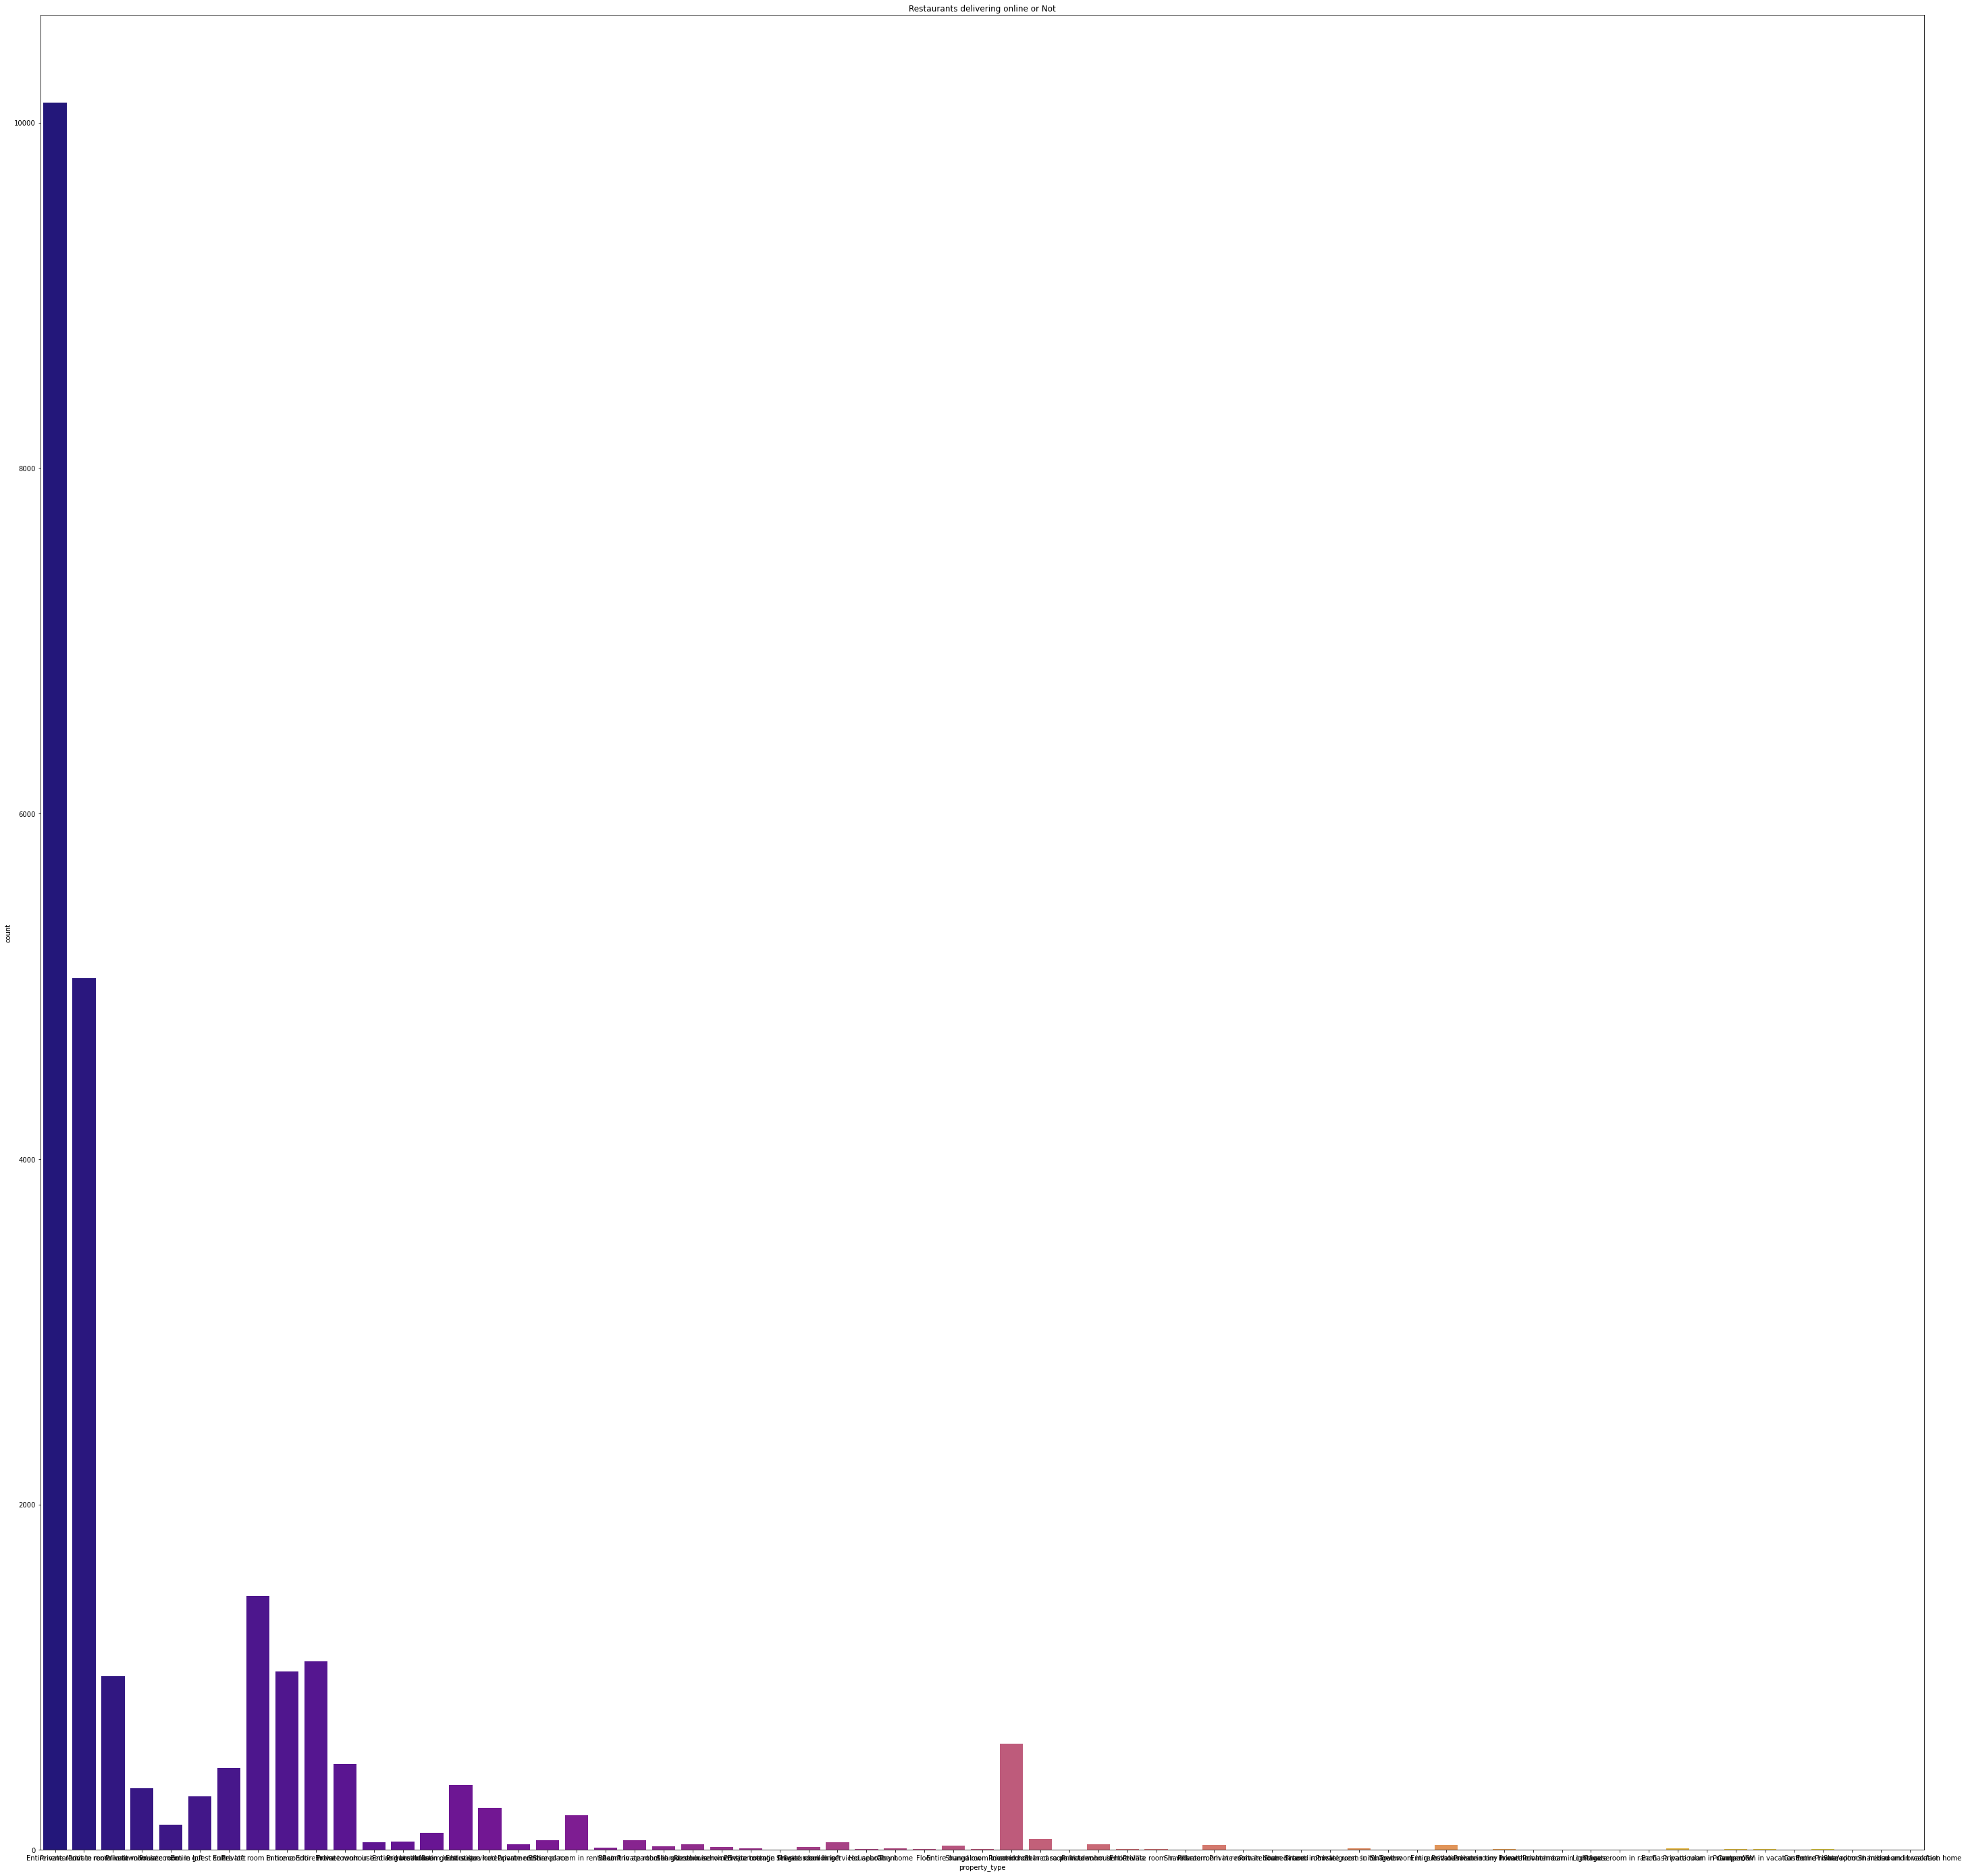

In [22]:
sns.countplot(airbnb['property_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(50,50)
plt.title('Restaurants delivering online or Not')

In [23]:
airbnb_en=airbnb
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(airbnb['property_type'])
airbnb['property_type_label']=Y
airbnb.head()

,description,host_is_superhost,host_identity_verified,host_response_time,host_response_rate,price,property_type,property_type_label
0,beautiful spacious skylit studio heart midtown...,f,t,a few days or more,39%,$225.00,Entire rental unit,14
1,room available rent bedroom bklyn share common...,f,t,within an hour,100%,$60.00,Private room in rental unit,40
2,welcome stay lovely duplex south slope brookly...,f,t,within an hour,100%,$275.00,Entire rental unit,14
3,please expect luxury here just basic room cent...,f,f,within a day,100%,$68.00,Private room in rental unit,40
4,spacebeautiful upper west side apartment great...,t,t,within a few hours,100%,$135.00,Entire rental unit,14


In [24]:
#Y = le.fit_transform(airbnb['price'])
#airbnb['price_label']=Y
#airbnb.head()

In [25]:
#Y = le.fit_transform(airbnb['description'])
#airbnb['description_label']=Y
#airbnb.head()

In [26]:
#Y = le.fit_transform(airbnb['host_is_superhost'])
#airbnb['host_is_superhost_label']=Y
#airbnb.head()

In [27]:
#Y = le.fit_transform(airbnb['host_identity_verified'])
#airbnb['host_identity_verified_label']=Y
#airbnb.head()

In [28]:
#Y = le.fit_transform(airbnb['host_response_time'])
#airbnb['host_response_time_label']=Y
#airbnb.head()

In [29]:
#Y = le.fit_transform(airbnb['host_response_rate'])
#airbnb['host_response_rate_label']=Y
#airbnb.head()

# Bi-LSTM

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.layers import Layer

import keras.backend as K

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [31]:
vocab_size = 73654
embedding_size = 200
epochs=100
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=50))
model.add(Bidirectional(LSTM(256,return_sequences=True)))
model.add(attention())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


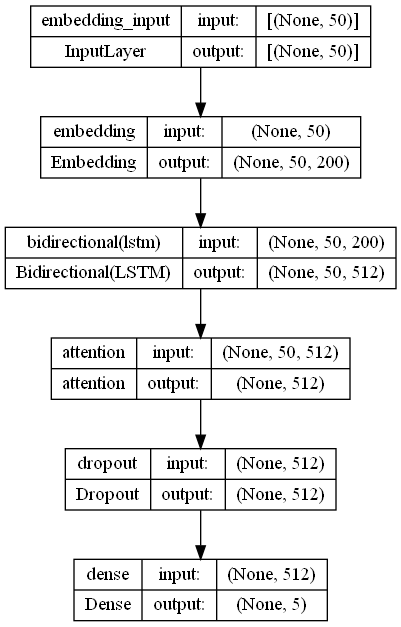

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)


# Sentiment Analyzer

In [33]:
# Create an object of Vader Sentiment Analyzer
vader_analyzer = SentimentIntensityAnalyzer()
negative = []
neutral = []
positive = []
compound = []

In [34]:
def sentiment_scores(df, negative, neutral, positive, compound):
    for i in df['description']:
        sentiment_dict = vader_analyzer.polarity_scores(i)
        negative.append(sentiment_dict['neg'])
        neutral.append(sentiment_dict['neu'])
        positive.append(sentiment_dict['pos'])
        compound.append(sentiment_dict['compound'])

In [35]:
sentiment_scores(airbnb, negative, neutral, positive, compound)

In [36]:
#airbnb["negative"] = negative
#airbnb["neutral"] = neutral
#airbnb["positive"] = positive
#airbnb["compound"] = compound

sentiment = []
for i in compound:
    if i >= 0.5 : 
        sentiment.append(2)
    
    elif i>= 0.1 and i< 0.5 :
        sentiment.append(1)

    elif i> - 0.1 and i< 0.1 :
        sentiment.append(0)
    
    elif i <= - 0.1 and i> - 0.5 : 
        sentiment.append(-1) 
    
    elif i <= - 0.5 : 
        sentiment.append(-2) 
        
airbnb['sentiment'] = sentiment

neg_tweets = airbnb.sentiment.value_counts()[-1]
neu_tweets = airbnb.sentiment.value_counts()[0]
pos_tweets = airbnb.sentiment.value_counts()[1]

In [37]:
airbnb.head()

,description,host_is_superhost,host_identity_verified,host_response_time,host_response_rate,price,property_type,property_type_label,sentiment
0,beautiful spacious skylit studio heart midtown...,f,t,a few days or more,39%,$225.00,Entire rental unit,14,2
1,room available rent bedroom bklyn share common...,f,t,within an hour,100%,$60.00,Private room in rental unit,40,2
2,welcome stay lovely duplex south slope brookly...,f,t,within an hour,100%,$275.00,Entire rental unit,14,2
3,please expect luxury here just basic room cent...,f,f,within a day,100%,$68.00,Private room in rental unit,40,2
4,spacebeautiful upper west side apartment great...,t,t,within a few hours,100%,$135.00,Entire rental unit,14,2


TEST AND SLIPT

In [38]:
y = pd.get_dummies(airbnb['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [39]:
print(model.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 100
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 200)           14730800  
                                                                 
 bidirectional (Bidirectiona  (None, 50, 512)          935936    
 l)                                                              
                                                                 
 attention (attention)       (None, 512)               562       
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
Total params: 15,669,863
Trainable params: 15,669,863
Non-trainable params: 0
____________________________________________

Epoch 32/100
143/143 [==============================] - 35s 243ms/step - loss: 0.2162 - accuracy: 0.9198 - precision: 0.9516 - recall: 0.8939 - val_loss: 0.2451 - val_accuracy: 0.9207 - val_precision: 0.9560 - val_recall: 0.8856
Epoch 33/100
143/143 [==============================] - 35s 246ms/step - loss: 0.2165 - accuracy: 0.9230 - precision: 0.9516 - recall: 0.8965 - val_loss: 0.2393 - val_accuracy: 0.9157 - val_precision: 0.9523 - val_recall: 0.8860
Epoch 34/100
143/143 [==============================] - 35s 246ms/step - loss: 0.2163 - accuracy: 0.9232 - precision: 0.9517 - recall: 0.8953 - val_loss: 0.2375 - val_accuracy: 0.9188 - val_precision: 0.9502 - val_recall: 0.8940
Epoch 35/100
143/143 [==============================] - 35s 247ms/step - loss: 0.2127 - accuracy: 0.9217 - precision: 0.9523 - recall: 0.8965 - val_loss: 0.2417 - val_accuracy: 0.9188 - val_precision: 0.9501 - val_recall: 0.8966
Epoch 36/100
143/143 [==============================] - 35s 247ms/step - loss: 0.211

Epoch 68/100
143/143 [==============================] - 35s 246ms/step - loss: 0.1951 - accuracy: 0.9289 - precision: 0.9526 - recall: 0.9061 - val_loss: 0.2405 - val_accuracy: 0.9218 - val_precision: 0.9499 - val_recall: 0.8968
Epoch 69/100
143/143 [==============================] - 35s 246ms/step - loss: 0.2048 - accuracy: 0.9247 - precision: 0.9499 - recall: 0.9009 - val_loss: 0.2408 - val_accuracy: 0.9254 - val_precision: 0.9538 - val_recall: 0.8989
Epoch 70/100
143/143 [==============================] - 35s 243ms/step - loss: 0.1962 - accuracy: 0.9288 - precision: 0.9515 - recall: 0.9070 - val_loss: 0.2377 - val_accuracy: 0.9254 - val_precision: 0.9505 - val_recall: 0.9043
Epoch 71/100
143/143 [==============================] - 35s 247ms/step - loss: 0.1960 - accuracy: 0.9277 - precision: 0.9522 - recall: 0.9080 - val_loss: 0.2391 - val_accuracy: 0.9226 - val_precision: 0.9475 - val_recall: 0.9026
Epoch 72/100
143/143 [==============================] - 35s 246ms/step - loss: 0.198

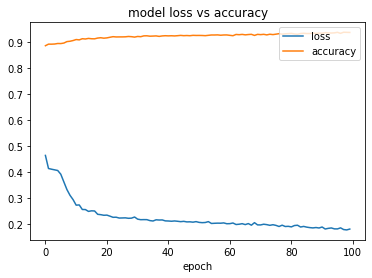

In [40]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 

In [41]:
import keras.backend as K
import textstat

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [42]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9121
Precision : 0.9314
Recall    : 0.8940
F1 Score  : 0.9123


149/149 [==============================] - 8s 47ms/step


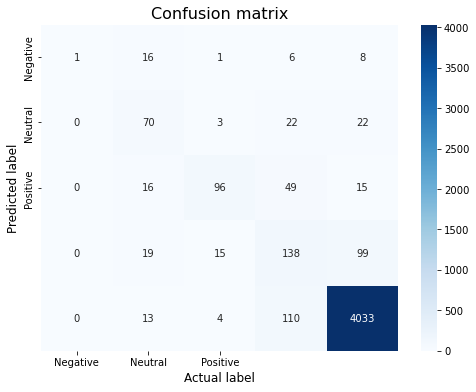

In [43]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_test, y_test)


In [44]:
#model.save('best_model.h5')
#print('Best model saved')

from keras.models import load_model

# Load model
#model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''
    
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50
    
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [45]:
predict_class(['I can help you enjoy your experience in this beautiful city'])

1/1 [==============================] - 0s 38ms/step


IndexError: list index out of range

In [ ]:
predict_class(['I can help you enjoy your experience in this beautiful city'])

In [ ]:
predict_class(['The food was meh'])

In [ ]:
predict_class(['This motel is my worst'])

In [ ]:
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(airbnb['description'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

In [ ]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("\n")
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0]," ",t[1],end=" ")
            #print("\n")

Readability

In [ ]:
import textstat

for text in airbnb['description']:
    airbnb['flesch_socre']=textstat.flesch_reading_ease(text)

In [ ]:
airbnb.head()

In [ ]:
print("Mean of All Sentence Flesch Socre : ",round(airbnb['flesch_socre'].mean(),2))

Sentiment intensity


1]Data Visualisation

In [ ]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"), dpi= 80)

data = [airbnb.sentiment.value_counts()[-1], airbnb.sentiment.value_counts()[0], airbnb.sentiment.value_counts()[1]]
categories = ['Negative', 'Neutral', 'Positive']
explode = [0.05,0.05,0.05]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=['#e55039', '#3c6382', '#78e08f'],
                                  startangle=140,
                                  explode=explode)

# Decoration
ax.legend(wedges, categories, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0.2, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of description  by Sentiment", fontsize=12, fontweight="bold")
plt.show()